## 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

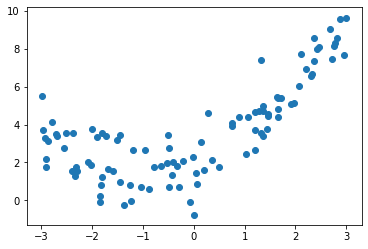

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

In [5]:
# 上面通过线性回归的得分是很低的，说明这个问题本身并不是一个线性问题，通过图也看得出

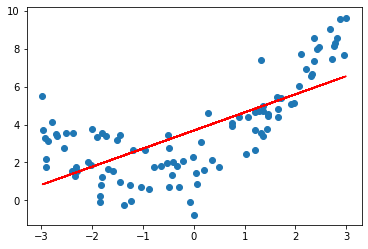

In [6]:
y_predict = lin_reg.predict(X)

plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

In [7]:
# 上面的得分是 R2 的计算方式，为了方便比较各种多项式拟合结果的评分，我们同时采用 MSE 来衡量

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_predict)

3.0750025765636577

### 使用多项式回归

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegression(degree):
    return Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [12]:
poly2_reg = PolynomialRegression(2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [13]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

In [14]:
# 多项式回归 的 MSE 小于线性回归的 MSE，说明拟合的更好了

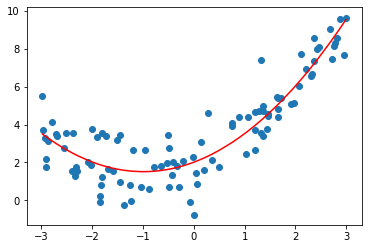

In [15]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [16]:
# 可以试试 10次幂 的多项式回归
poly10_reg = PolynomialRegression(10)
poly10_reg.fit(X, y)
y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764148

In [17]:
# 结果比 2次幂的 多项式回归 要好一点

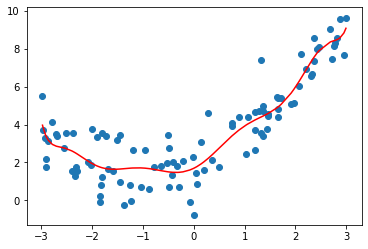

In [18]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [19]:
# 可以试试 100次幂 的多项式回归
poly100_reg = PolynomialRegression(100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6879768981520811

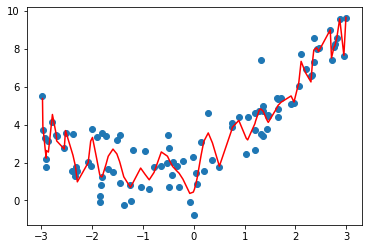

In [20]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

In [ ]:
# 从 MSE 的结果看，100 次幂的多项式是更好，但是得到的过分的复杂，这种情况我们称作过拟合：over fit
# 相反，最开始用 1次幂的线性回归 就是 欠拟合： under fit